<a href="https://colab.research.google.com/github/divgup/cs671/blob/master/assignment1_q2(mnist_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from keras.utils import to_categorical
#X_train_orig is a 3-D array containing the pixel values of grey image
#Y_train_orig is 1-D array containing labels of corresponding image 
#similarily for X_test and Y_test 
(X_train_orig,Y_train_orig),(X_test_orig,Y_test_orig) = mnist.load_data()
#reshape to a column vector
print(Y_train_orig.shape)
Y_tr_resh = Y_train_orig.reshape(60000,1)
Y_te_resh = Y_test_orig.reshape(10000,1)

#one hot encoding to give a 2-D array of size (60000,10) and (10000,10) for training and testing set resp.
Y_tr_T = to_categorical(Y_tr_resh,num_classes=10)
Y_te_T = to_categorical(Y_te_resh,num_classes=10)
Y_train = Y_tr_T.T
Y_test = Y_te_T.T
print(Y_train.shape)
size=Y_train.shape[1]

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
(60000,)
(10, 60000)


In [2]:
X_train_flat = X_train_orig.reshape(X_train_orig.shape[0],-1).T
X_test_flat = X_test_orig.reshape(X_test_orig.shape[0],-1).T
X_train = X_train_flat/255.
X_test = X_test_flat/255.
print(X_train_flat.shape)

(784, 60000)


In [0]:
def softmax(a):
  return np.exp(a)/(np.sum(np.exp(a),axis=0,keepdims=True))
def Relu(u):
  u[u<0] = 0
  return u  

In [0]:
parameters = {}
def initialisation():
  #hardcoded the no. of units in each layer
  layers = [784,50,50,10]
  for it in range(1,len(layers)):
    parameters["w"+str(it)] = np.random.rand(layers[it-1],layers[it])*np.sqrt(2/layers[it-1])
    parameters["b"+str(it)] = np.zeros((layers[it],1))
  #print(parameters["w2"].shape)
  #print(weights[1])


In [0]:
initialisation()
# print(parameters)

In [0]:
def calc_loss(Y_train,output):
  loss = np.sum(np.sum(-Y_train*np.log(output),axis=0,keepdims=True),axis=1,keepdims=True)
  return loss/Y_train.shape[1]

In [0]:
layer = {}
def forward_pass(x,num_layers):
  for it in range(num_layers-1):
    #print(parameters["w"+str(it+1)].shape)
    layer["pre_hid"+str(it+1)] = np.dot(parameters["w"+str(it+1)].T,x)+parameters["b"+str(it+1)]
    #print(layer)
    if it < num_layers-2:
      layer["activated"+str(it+1)] = Relu(layer["pre_hid"+str(it+1)])
    else:
      #print(layer["pre_hid"+str(it+1)])
      layer["activated"+str(it+1)] = softmax(layer["pre_hid"+str(it+1)])
      #print(layer["activated"+str(it+1)])
    x = layer["pre_hid"+str(it+1)]    
    #if it < len(layers)-2):
      #x = Relu(l)
    #else:
      #x = softmax(l)
  #return layer      


In [0]:
def drelu(x):
  y = np.ones(x.shape)
  y[x<0] = 0
  return y

In [0]:
def back_prop(X_train,num_layers):
  output = layer["activated"+str(num_layers-1)]
  #print(output.shape)
  #print(Y_train.shape)
  grad = {}
  m = X_train.shape[1]
  grad["a"+str(num_layers-1)] = -(Y_train-output)/m
  grad["h"+str(num_layers-2)] = np.dot(parameters["w"+str(num_layers-1)],grad["a"+str(num_layers-1)])
  #grad["w"+str(len(layers)-1)] = np.dot(output-Y_train,x[pre_hid+str(len(layers)-2)].T)
  for it in range(1,num_layers-1):
    Indicator = drelu(layer["pre_hid"+str(num_layers-it-1)])
    grad["a"+str(num_layers-1-it)] = np.multiply(grad["h"+str(num_layers-it-1)],Indicator) 
    grad["h"+str(num_layers-it-2)] = np.dot(parameters["w"+str(num_layers-it-1)],grad["a"+str(num_layers-1-it)])
  grad["w1"] = np.dot(grad["a1"],X_train.T)
  grad["b1"] = np.sum(grad["a"+str(1)],axis=1,keepdims=True)
  for it in range(1,num_layers-1):  
    grad["w"+str(it+1)] = np.dot(grad["a"+str(it+1)],layer["pre_hid"+str(it)].T) 
    grad["b"+str(it+1)] = np.sum(grad["a"+str(it+1)],axis=1,keepdims=True)
  return grad  
  #del_loss_resp_to_h_l0 = np.dot(parameter["w2"],-(Y_train-output))
  #pre_hid2 = x["pre_hid"+str(len(layers)-2)]
  #i = np.ones(pre_hid2.shape)
  #pre_hid1 = x["pre_hid"+str(len(layers)-3)] 
  #i[pre_hid2<0] = 0
  #del_loss_resp_to_al = np.multiply(del_loss_resp_to_h_l0,i)
  #del_loss_resp_to_h_l1 = np.dot(paramter["w1"],del_loss_resp_to_al)

In [0]:
def weight_update(num_layers,alpha,grad):
  for i in range(num_layers-1):
    parameters["w"+str(num_layers-i-1)] = parameters["w"+str(num_layers-i-1)] - (alpha*grad["w"+str(num_layers-i-1)]).T
    parameters["b"+str(num_layers-i-1)] = parameters["b"+str(num_layers-i-1)] - (alpha*grad["b"+str(num_layers-i-1)])
  return parameters  

In [0]:
def cal_acc(Y_train,output):
  output =output.T
  # print(output.shape)
  for i in range (0,size):
    maxno=0
    index=0
    for j in range (0, 10):   
      if(maxno<output[i][j]):
        index=j
        maxno=output[i][j]
        output[i][j]=0
      # print(maxno)
    output[i][index]=1
  # print(output)
  output=output.T
  acc = np.sum(np.sum(Y_train*output,axis=0,keepdims=True),axis=1,keepdims=True)/Y_train.shape[1]
  print(type(acc))

  #def metrics():
  acc_percentage = acc*100
  print(acc_percentage)
  return acc_percentage
  



In [67]:
alpha = 0.01
num_layers = 4
cost=[]
accuracy=[]
num_itr = 1000
num_hidden_layers = 2
initialisation()
forward_pass(X_train,num_layers)

#print(layer["activated"+str(num_layers-1)])
for it in range(num_itr):
  forward_pass(X_train,num_layers)
  output = layer["activated"+str(num_layers-1)]
  grad = back_prop(X_train,num_layers)
  #print(parameters["b1"].shape)
  weight_update(num_layers,alpha,grad)
  if it%50==0:
    cost.append(calc_loss(Y_train,output))
    accuracy.append(cal_acc(Y_train, output))
    cal_acc(Y_train,output)
    # print(calc_loss(Y_train,output))
  #print(parameters["b1"].shape)    

[[0.10361022]]
[[10.36102167]]
[[0.09949581]]
[[9.94958059]]
[[0.17336322]]
[[17.3363222]]
[[0.17336322]]
[[17.3363222]]
[[0.1972392]]
[[19.72392005]]
[[0.17947064]]
[[17.94706406]]
[[0.17992079]]
[[17.9920789]]
[[0.17992079]]
[[17.9920789]]
[[0.19232122]]
[[19.23212197]]
[[0.19164621]]
[[19.16462055]]
[[0.20550081]]
[[20.55008126]]
[[0.20550081]]
[[20.55008126]]
[[0.26694746]]
[[26.69474593]]
[[0.26687731]]
[[26.6877314]]
[[0.32651171]]
[[32.65117141]]
[[0.32597396]]
[[32.59739588]]
[[0.42513166]]
[[42.51316588]]
[[0.42402079]]
[[42.40207922]]
[[0.54672659]]
[[54.67265859]]
[[0.54506257]]
[[54.50625668]]
[[0.65743181]]
[[65.74318074]]
[[0.65516767]]
[[65.51676746]]
[[0.6879499]]
[[68.79499038]]
[[0.68566506]]
[[68.56650577]]
[[0.70752099]]
[[70.75209881]]
[[0.70507205]]
[[70.5072047]]
[[0.72475941]]
[[72.47594093]]
[[0.72203871]]
[[72.20387106]]
[[0.74000979]]
[[74.00097897]]
[[0.7370309]]
[[73.70308968]]
[[0.75205327]]
[[75.20532665]]
[[0.74904615]]
[[74.90461472]]
[[0.76255671]]
[[7

In [88]:
#print(parameters)
# print(accuracy)
output = layer["activated"+str(num_layers-1)]
# print(Y_train.shape[1])
temp=output
# print(temp)
output =output.T
# print(output.shape)
for i in range (0,Y_train.shape[1]):
  maxno=0
  index=0
  for j in range (0, 10):   
    if(maxno<output[i][j]):
     index=j
     maxno=output[i][j]
    output[i][j]=0
    # print(maxno)
  output[i][index]=1
rows, cols = (10,10) 
confmat = [[0]*cols]*rows
 
# print(confmat)
confmat=confusion_matrix(output)
for i in range(0,10):
  print(confmat[i])
# print(confmat)
# print(output)
output=output.T
acc = np.sum(np.sum(Y_train*output,axis=0,keepdims=True),axis=1,keepdims=True)/Y_train.shape[1]
# print(acc)
#def metrics():
acc_percentage = acc*100
# print(acc_percentage)

[5531, 3, 46, 11, 26, 189, 53, 4, 53, 7]
[0, 6518, 54, 13, 0, 2, 2, 10, 137, 6]
[112, 221, 4522, 213, 200, 67, 285, 35, 285, 18]
[29, 163, 237, 4708, 16, 300, 16, 78, 532, 52]
[31, 112, 22, 0, 4438, 3, 121, 45, 118, 952]
[126, 110, 238, 1040, 102, 2598, 134, 289, 598, 186]
[120, 159, 343, 6, 67, 24, 5132, 0, 66, 1]
[91, 351, 17, 5, 94, 36, 1, 5109, 208, 353]
[24, 609, 223, 502, 81, 286, 66, 41, 3783, 236]
[66, 141, 22, 58, 1218, 55, 11, 835, 165, 3378]


In [0]:
def getdigit(row):
  for i in range(0,10):
    if row[i]==1:
      return i
  return 0


In [0]:
def get_confusionmatrix(output):
  rows, cols = (10, 10) 
  z=Y_train.T
  print(z.shape[0])
  confmat = [[0]*cols]*rows
  print("here", confmat)
  for i in range(0,z.shape[0]):
    pred=getdigit(output[i])
    actual=getdigit(z[i])
  return confmat


In [93]:
print(Y_train.shape)

(10, 60000)


In [0]:
def confusion_matrix(output):
  rows, cols = (10, 10)
  predicted=[]
  actual=[]
  conf = [[0]*cols]*rows
  z=Y_train.T
  o=output
  for i in range(0,z.shape[0]):
    pred=getdigit(o[i])
    act=getdigit(z[i])
    predicted.append(pred)
    actual.append(act)

  # print(predicted, actual)

  # for i in range(0,10):
  #   for j in range(0,10):
  #   conf[i].append()
  # print(conf)
  col_num=10
  row_num=10
  multi_list = [[0 for col in range(col_num)] for row in range(row_num)]
  for i in range(0,z.shape[0]):
    multi_list[actual[i]][predicted[i]]=multi_list[actual[i]][predicted[i]]+1
  # print(multi_list)
  return multi_list

In [0]:
def calprecision(index):
  tp=confmat[index][index]
  sumno=0
  for i in range(0, 10):
    sumno=sumno+confmat[index][i]
  fp=sumno-tp
  precision=tp/sumno
  return precision
    





In [0]:
def calrecall(index):
  tp=confmat[index][index]
  sumno=0
  for i in range(0, 10):
    sumno=sumno+confmat[i][index]
  fn=sumno-tp
  rec=tp/sumno
  return rec

[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
10.361021673507938
(20,)
(20, 1, 1)


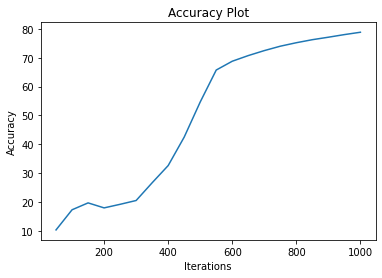

In [82]:
import matplotlib as mpl
import matplotlib.pyplot as plt
index=[]
for i in range(1,21):
  index.append(i*50)
print(index)
print(accuracy[0][0][0])
accu=[]
for i in range(0,20):
  accu.append(accuracy[i][0][0])

print(np.array(accu).shape)
# plt.plot(index,accuracy) 

# naming the x axis 
plt.xlabel('Iterations') 
# naming the y axis 
plt.ylabel('Accuracy') 
  
# giving a title to my graph 
plt.title('Accuracy Plot') 
  
# print(np.array(accuracy).shape)
plt.plot(index,accu)


(20,)
(20,)


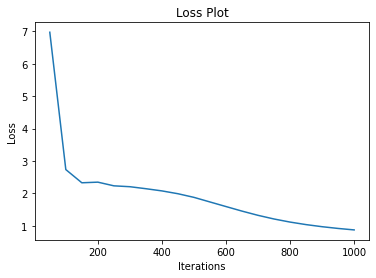

In [85]:


cost_iter=[]
for i in range(0,20):
  cost_iter.append(cost[i][0][0])
print(np.array(cost_iter).shape)
print(np.array(accu).shape)
# plt.plot(index,accuracy) 

# naming the x axis 
plt.xlabel('Iterations') 
# naming the y axis 
plt.ylabel('Loss') 
  
# giving a title to my graph 
plt.title('Loss Plot') 
  
# print(np.array(accuracy).shape)
plt.plot(index,cost_iter)

In [95]:
fscore=[]
for i in range(0,10):
  hp= harmonicmean(calrecall(i),calprecision(i))
  fscore.append(hp)
print(fscore)

[0.9177798058574629, 0.8616564214422631, 0.7741825029960624, 0.742177031607157, 0.7345249917245945, 0.5785547266451397, 0.8743504557458046, 0.8038706632050979, 0.6414038657171922, 0.6065720955288203]


In [0]:
def harmonicmean(a,b):
  hp=2*a*b/(a+b)
  return hp